# <u> Survival Analysis On Titanic Dataset.<u>

*The sinking of the Titanic is one of the most infamous shipwrecks in history.*

*This is a dataset where On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.*

*While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.*

***The Attributes of the dataset are as follows :***   
- *Survived - Survival (0 = No, 1 = Yes)*
- *pclass - A proxy for socio-economic status (1st = Upper, 2nd = Middle, 3rd = Lower)*
- *Name - Names of the passangers on board*
- *sex - Gender of the passangers on board (0 = Male, 1 = Female)*
- *Age - Age of the passangers on board*
- *sibsp - Number of sibblings/sprouse on board* 
    - *The dataset defines family relations in this way...*
    - *Sibling = brother, sister, stepbrother, stepsister*
    - *Spouse = husband, wife (mistresses and fiancés were ignored)*
- *Parch - Number of parents/children on board*
       -* The dataset defines family relations in this way...*
       -* Parent = mother, father*
       -* Child = daughter, son, stepdaughter, stepson*
       -* Some children travelled only with a nanny, therefore parch=0 for them.*
- *Ticket - Ticket Number* 
- *Fare - Passanger fare*
- *Cabin - Cabin Number*
- *Embarked - Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)* 
 

## <u> Problem Statement: <u>
#### ***To build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).***

## <u>Process involved in the process:<u>
- ***i).Big Picture***
- ***ii).Data Analysis and Exploration***
- ***iii).Feature Engineering***
- ***iv).Model Building***
- ***v).Interpretation***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mp
from matplotlib import colors
import statsmodels.api as sm
import pylab as py
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from scipy.stats import probplot
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
import klib
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
#from lazypredict.Supervised import LazyClassifier
import warnings
from sklearn.model_selection import RandomizedSearchCV
import sklearn.metrics
from sklearn.ensemble import AdaBoostClassifier
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
path = r"C:\Users\User\Documents\DATA SCIENCE PROJECTS\Titanic.csv"
train_data = pd.read_csv(path)
data2 = train_data

# Reading the test data
path2 = r"C:\Users\User\Documents\DATA SCIENCE PROJECTS\test.csv"
test_data = pd.read_csv(path2)
data3 = test_data

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 1). Big Picture:

### *i).Determining the Structure and Summary of the dataset:*

In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [6]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.00,418.00,332.00,418.00,418.00,417.00
mean,1100.50,2.27,30.27,0.45,0.39,35.63
std,120.81,0.84,14.18,0.90,0.98,55.91
min,892.00,1.00,0.17,0.00,0.00,0.00
25%,996.25,1.00,21.00,0.00,0.00,7.90
50%,1100.50,3.00,27.00,0.00,0.00,14.45
75%,1204.75,3.00,39.00,1.00,0.00,31.50
max,1309.00,3.00,76.00,8.00,9.00,512.33


*From the above table, we obtain a very clear picture on the summary of the dataset, i.e The measures of central tendency and dispersion with respect to each variable.*

### ii). *Determining the unique values:*

In [7]:
train_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [8]:
test_data.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

*From the above line of code, we are able to understand that the variables 'PassengerId','Name','Ticket' have too many unique values which is not useful to the subject under study. Therefore we drop these variables from both train and test data.*

In [5]:
train_data = train_data.drop(['PassengerId','Ticket','Name'], axis = 1)
test_data = test_data.drop(['PassengerId','Ticket','Name'], axis = 1)

### iii). *Determining the number of Categorical variables:*

In [54]:
# categorical varibales of train data
cat_count = 0
num_count = 0
for i in train_data.dtypes:
    if i == 'object':
        cat_count = cat_count + 1
    else:
        num_count = num_count + 1

print("The Number of Numerical variables in Train Data :",num_count)
print("The Number of qualitative variables in Train Data:",cat_count)

#categorical variables of test data
cat_count = 0
num_count = 0
for i in test_data.dtypes:
    if i == 'object':
        cat_count = cat_count + 1
    else:
        num_count = num_count + 1

print("The Number of Numerical variables in Test Data:",num_count)
print("The Number of qualitative variables in Test Data:",cat_count)

The Number of Numerical variables in Train Data : 6
The Number of qualitative variables in Train Data: 3
The Number of Numerical variables in Test Data: 5
The Number of qualitative variables in Test Data: 3


### iv). *Determining the Structure of Dataset:*

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Cabin     91 non-null     object 
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


## 2). Data Analysis and Exploration:

### *i). Determining the missing values :* 

In [6]:
count_missing_data = train_data.isnull().sum()
percent_missing_data = round(train_data.isnull().sum()/len(train_data) * 100, 1)
missing_data = pd.concat([count_missing_data, percent_missing_data], axis = 1)
missing_data.columns = ["Missing (count)", "Missing (%)"]
missing_data

,Missing (count),Missing (%)
Survived,0,0.0
Pclass,0,0.0
Sex,0,0.0
Age,177,19.9
SibSp,0,0.0
Parch,0,0.0
Fare,0,0.0
Cabin,687,77.1
Embarked,2,0.2


- ***Train Data***: *There are missing values with respect to the varibles 'AGE','CABIN' and 'EMBARKED'.*

In [7]:
count_missing_data = test_data.isnull().sum()
percent_missing_data = round(test_data.isnull().sum()/len(test_data) * 100, 1)
missing_data = pd.concat([count_missing_data, percent_missing_data], axis = 1)
missing_data.columns = ["Missing (count)", "Missing (%)"]
missing_data

,Missing (count),Missing (%)
Pclass,0,0.0
Sex,0,0.0
Age,86,20.6
SibSp,0,0.0
Parch,0,0.0
Fare,1,0.2
Cabin,327,78.2
Embarked,0,0.0


- ***Test Data***: *There are missing values with respect to teh variables 'AGE', 'CABIN' and 'FARE'.*

***Since the variable 'CABIN' has more than 25% missing values , this variable will be remove for the dataset.***

In [8]:
train_data = train_data.drop(['Cabin'], axis = 1)
test_data = test_data.drop(['Cabin'], axis = 1)

### *ii).Detecting the Presence of Outliers :* 

*An Outlier is an observation in a given dataset that lies far from the rest of the observations.Treating the outliers is very crucial as they can negatively affect the statistical analysis and the training process of a machine learning algorithm resulting in lower accuracy.*

Text(0.5, 1.0, 'Age of Test Data')

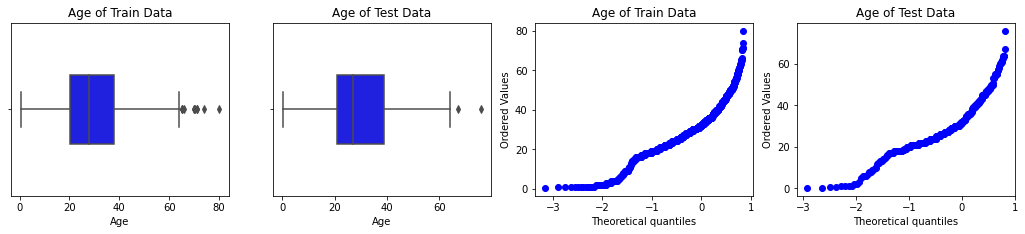

In [58]:
warnings.filterwarnings("ignore")

plt.figure(figsize = (18,7))

#Age analysis for both datasets:
# Boxplot
plt.subplot(2,4,1)
age_train = sns.boxplot(x = train_data['Age'], color = 'blue', width = 0.4)
plt.title("Age of Train Data")
plt.subplot(2,4,2)
age_test = sns.boxplot(x = test_data['Age'], color = 'blue', width = 0.4)
plt.title("Age of Test Data")

#QQ plot:
plt.subplot(2,4,3)
probplot(train_data['Age'], dist = 'norm', plot=plt)
plt.title("Age of Train Data")
plt.subplot(2,4,4)
probplot(test_data['Age'], dist = 'norm', plot=plt)
plt.title("Age of Test Data")

Text(0.5, 1.0, 'Fare of Test Data')

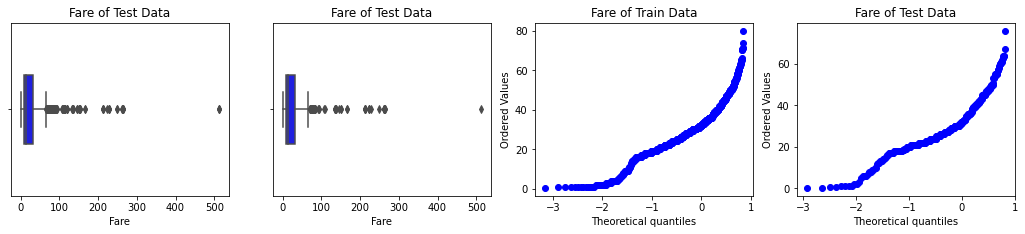

In [59]:
warnings.filterwarnings("ignore")

plt.figure(figsize = (18,7))

#Fare analysis for both datasets:
# Boxplot
plt.subplot(2,4,1)
age_train = sns.boxplot(x = train_data['Fare'], color = 'blue', width = 0.4)
plt.title("Fare of Test Data")
plt.subplot(2,4,2)
age_test = sns.boxplot(x = test_data['Fare'], color = 'blue', width = 0.4)
plt.title("Fare of Test Data")

#QQ plot:
plt.subplot(2,4,3)
probplot(train_data['Age'], dist = 'norm', plot=plt)
plt.title("Fare of Train Data")
plt.subplot(2,4,4)
probplot(test_data['Age'], dist = 'norm', plot=plt)
plt.title("Fare of Test Data")

***The above figures with respect to the variable 'FARE' and 'AGE' of both TRAIN and TEST data, helps us in detecting the presence of huge number of outliers which is intended to be treated later.***

### *iii). Determining the distribution of the variables :*

*Determining the distribution or skewness helps us to understand where the most information is lying and also helps in analyzing  the outliers in a given data. If the values of a specific independent variable (feature) are skewed, depending on the model, skewness may violate model assumptions or may reduce the interpretation of feature importance.*

Text(0.5, 1.0, 'The distributions with respect to Train Data')

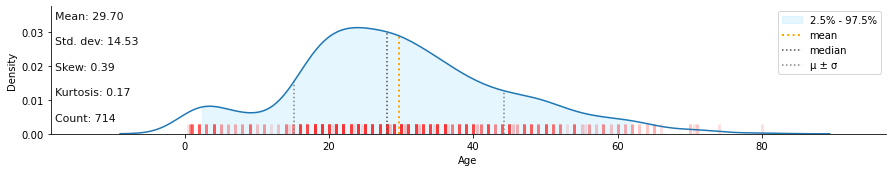

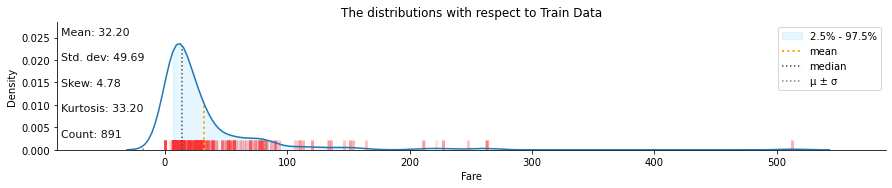

In [60]:
train_variables = train_data[['Age','Fare']]
klib.dist_plot(train_variables)
plt.title("The distributions with respect to Train Data")    # write big 

Text(0.5, 1.0, 'The distributions with respect to Test Data')

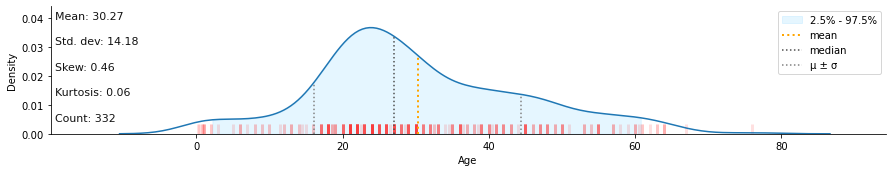

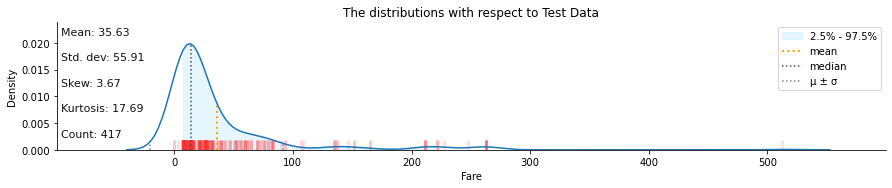

In [61]:
test_variables = test_data[['Age','Fare']]
klib.dist_plot(test_variables)
plt.title("The distributions with respect to Test Data")    # write big 

***Clearly, the variable 'FARE' are heavily skewed to the right in both TEST and TRAIN data.***

### *iv). Imputation of the Missing Values:*

### *a). EMBARKED VARIABLE:* 

***As mentioned earlier, there are missing values with respect to 'Embarked' only in the train data which is to be imputed by the most frequent value(mode) of this variable.***

In [9]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
train_data['Embarked'] = np.where((train_data['Embarked'].isnull() == True),'S', train_data['Embarked'])
train_data['Embarked'].isnull().sum()

0

### *b). AGE VARIABLE:*

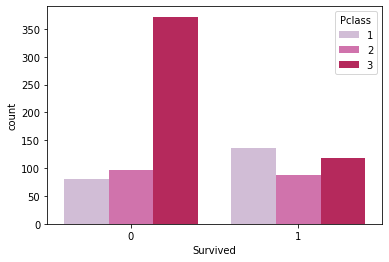

In [21]:
bar_pclass = sns.countplot(x = 'Survived', hue = 'Pclass', data = train_data, palette = 'PuRd')

***From the above figure, its is very evident that passengers belonging to the 1st class(richer class) have more chances of being survived.So therefore we can make an assumption that the first preferneces/priority was given to the passengers belonging to the 1st class.***

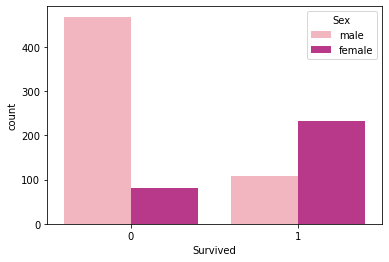

In [22]:
bar_gender = sns.countplot(x = 'Survived',hue = 'Sex', data = train_data, palette = 'RdPu')

***The graph tells us that majority who died were male passengers than female passengers.***

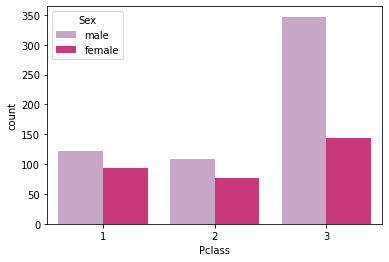

In [23]:
bar_gender_pclass = sns.countplot(x = 'Pclass', hue = 'Sex', data = train_data, palette = 'PuRd')

***From the above figure, it is very evident that strength of the female passengers are more in each of the Pclass.***

In [24]:
data2 = train_data.dropna()

group_age = round(data2.groupby(['Pclass','Sex']).aggregate({'Age':'median'}),0)
print(group_age)

                Age
Pclass Sex         
1      female 35.00
       male   40.00
2      female 28.00
       male   30.00
3      female 22.00
       male   25.00


***We will impute the missing values in the variable 'Age' by mean of age with respect to 'Pclass' and 'Gender' for the following two reasons:***    
- ***a). The count of the female passengers in each of the Pclass is more than that of the male.***  
- ***b). The surival rate for the passengers travelling in 1st pclass is more than any other Pclasses.***

In [11]:
#Treating AGE of traindata:
data = train_data

data['Age'] = np.where((data['Age'].isnull() == True) & (data['Sex'] == 'female') & (data['Pclass'] == 1),35.0, data['Age'])
data['Age'] = np.where((data['Age'].isnull() == True) & (data['Sex'] == 'male') & (data['Pclass'] == 1),40.0, data['Age'])
data['Age'] = np.where((data['Age'].isnull() == True) & (data['Sex'] == 'female') & (data['Pclass'] == 2),29.0, data['Age'])
data['Age'] = np.where((data['Age'].isnull() == True) & (data['Sex'] == 'male') & (data['Pclass'] == 2),18.0, data['Age'])
data['Age'] = np.where((data['Age'].isnull() == True) & (data['Sex'] == 'female') & (data['Pclass'] == 3),24.0, data['Age'])
data['Age'] = np.where((data['Age'].isnull() == True) & (data['Sex'] == 'male') & (data['Pclass'] == 3),25.0, data['Age'])

train_data = data

In [12]:
# Treating AGE of test data :
data = test_data
data['Age'] = np.where((data['Age'].isnull() == True) & (data['Sex'] == 'female') & (data['Pclass'] == 1),35.0, data['Age'])
data['Age'] = np.where((data['Age'].isnull() == True) & (data['Sex'] == 'male') & (data['Pclass'] == 1),40.0, data['Age'])
data['Age'] = np.where((data['Age'].isnull() == True) & (data['Sex'] == 'female') & (data['Pclass'] == 2),29.0, data['Age'])
data['Age'] = np.where((data['Age'].isnull() == True) & (data['Sex'] == 'male') & (data['Pclass'] == 2),18.0, data['Age'])
data['Age'] = np.where((data['Age'].isnull() == True) & (data['Sex'] == 'female') & (data['Pclass'] == 3),24.0, data['Age'])
data['Age'] = np.where((data['Age'].isnull() == True) & (data['Sex'] == 'male') & (data['Pclass'] == 3),25.0, data['Age'])

test_data = data

In [13]:
train_data['Age'].isnull().sum()

0

In [14]:
test_data['Age'].isnull().sum()

0

### *c). FARE VARIABLE:*

***As observed earlier, there is 1 missing values with respect to the 'FARE' variable of test data which will be imputed by the median of the same due to the presence of the outliers.***

In [15]:
median_fare = round(test_data['Fare'].median(),0)

In [16]:
test_data['Fare'] = np.where((test_data['Fare'].isnull() == True), median_fare, test_data['Fare'])

In [17]:
test_data['Fare'].isnull().sum()

0

In [34]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [35]:
test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

***Clearly, all the missing values have been created.***

## *v). Outlier Treatment :*

- ***From the above histograms and boxplots, it is very evident that 'FARE' variable is positively skewed due to which we will be treating the ouliers with IQR.***
- ***On the other hand, the variable 'AGE' is approximately normally distributed because of which we will be using the z-score to detect the outliers of the same.***

### *a). FARE VARAIBLE:*

In [19]:
outliers = []
def detect_outliers_iqr(data):
    """ Function to detect and handle outliers using IQR."""
    
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    
    IQR = q3-q1
    
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
  
    data = np.where(data < lwr_bound, lwr_bound, data)
    data = np.where(data > upr_bound, upr_bound, data)
    
    return data 

In [20]:
#calling the function for train_data:
train_data['Fare'] = detect_outliers_iqr(train_data['Fare'])

#calling the function for testdata:
test_data['Fare'] = detect_outliers_iqr(test_data['Fare'])

Text(0.5, 1.0, 'TrainData(Fare) - After treatment')

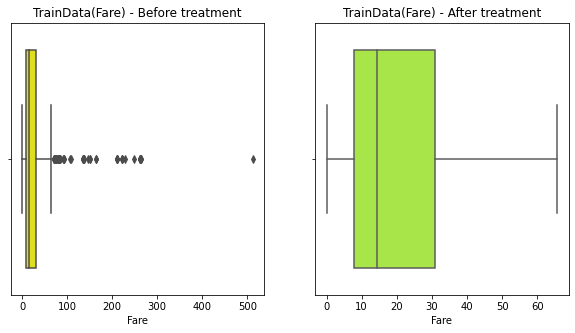

In [21]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.boxplot(x = data3['Fare'], color = 'yellow')
plt.title("TrainData(Fare) - Before treatment")

plt.subplot(1,2,2)
sns.boxplot(x = train_data['Fare'], color = 'greenyellow')
plt.title('TrainData(Fare) - After treatment')

Text(0.5, 1.0, 'TestData(Fare) - Before treatment')

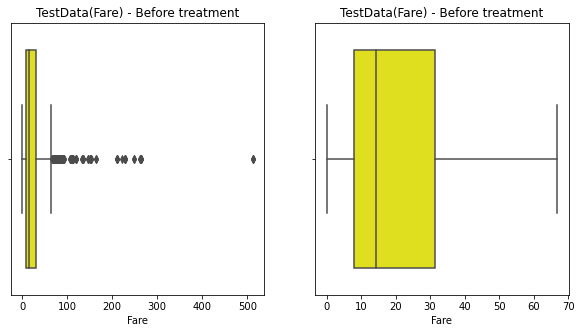

In [98]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.boxplot(x = data2['Fare'], color = 'yellow')
plt.title("TestData(Fare) - Before treatment")


plt.subplot(1,2,2)
sns.boxplot(x = test_data['Fare'], color = 'yellow')
plt.title("TestData(Fare) - Before treatment")

### *b). AGE VARIABLE:*

In [22]:
p = []
def zscore_treatment(data):
    '''Function for oulier Treatment using z-score.'''
    
    mean1 = np.mean(data)
    std1 = np.std(data)
    
    fifth = np.percentile(sorted(data), 5)
    ninty_fifth = np.percentile(sorted(data), 95)
    
    for i in data:
        z_score = (i - mean1)/std1
    
        if (z_score < -3):
            data = data.replace([i], fifth)
        elif (z_score > 3):
            data = data.replace([i],ninty_fifth )
        else:
            pass
        
    return data          

In [23]:
# calling the function for train data
train_data['Age'] = zscore_treatment(train_data['Age'])

#calling the function for test data:
test_data['Age'] = zscore_treatment(test_data['Age'])

Text(0.5, 1.0, 'TrainData(Age) - After treatment')

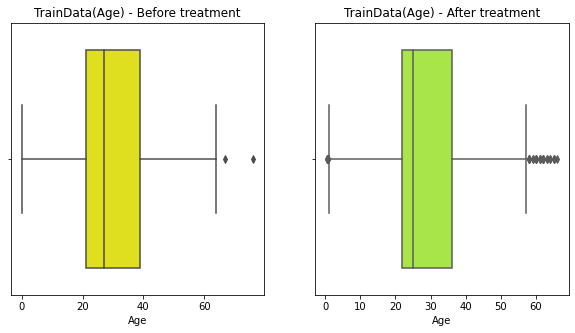

In [44]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.boxplot(x = data3['Age'], color = 'yellow')
plt.title("TrainData(Age) - Before treatment")

plt.subplot(1,2,2)
sns.boxplot(x = train_data['Age'], color = 'greenyellow')
plt.title('TrainData(Age) - After treatment')

Text(0.5, 1.0, 'TestData(Age) - After treatment')

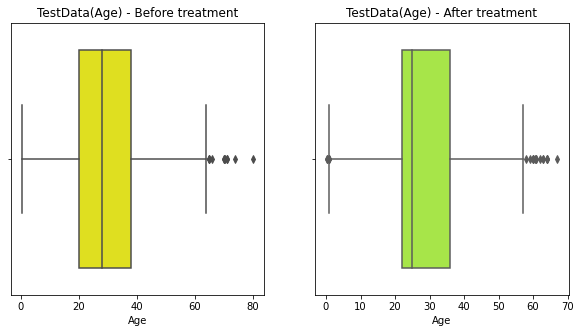

In [45]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.boxplot(x = data2['Age'], color = 'yellow')
plt.title("TestData(Age) - Before treatment")

plt.subplot(1,2,2)
sns.boxplot(x = test_data['Age'], color = 'greenyellow')
plt.title('TestData(Age) - After treatment')

## 3). Feature Engineering:

### *i). Creation of New Features:*

In [24]:
train_data['Familymembers_onboard'] = train_data['SibSp'] + train_data['Parch'] 
test_data['Familymembers_onboard'] = test_data['SibSp'] + test_data['Parch']

***A new attribute Familymembers_onboard has been generated from Sibsp and Parch. Therefore we need to drop Sibsp and Parch from the data as it will lead to multicollinearity.***

In [25]:
train_data = train_data.drop(['Parch','SibSp'], axis = 1)
test_data = test_data.drop(['Parch','SibSp'], axis = 1)

### *ii). Dummy Enconding:*

In [26]:
train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)

In [27]:
train_data.head()

,Survived,Pclass,Age,Fare,Familymembers_onboard,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,0.0,1,0,1,0,0,1
1,1,1,38.0,0.0,1,1,0,1,0,0
2,1,3,26.0,0.0,0,1,0,0,0,1
3,1,1,35.0,0.0,1,1,0,0,0,1
4,0,3,35.0,0.0,0,0,1,0,0,1


In [28]:
test_data.head()

,Pclass,Age,Fare,Familymembers_onboard,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0.0000,0,0,1,0,1,0
1,3,47.0,0.0000,1,1,0,0,0,1
2,2,62.0,3.1708,0,0,1,0,1,0
3,3,27.0,6.4375,0,0,1,0,0,1
4,3,22.0,6.4375,2,1,0,0,0,1


### *ii). Removing MultiCollinearity:*

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

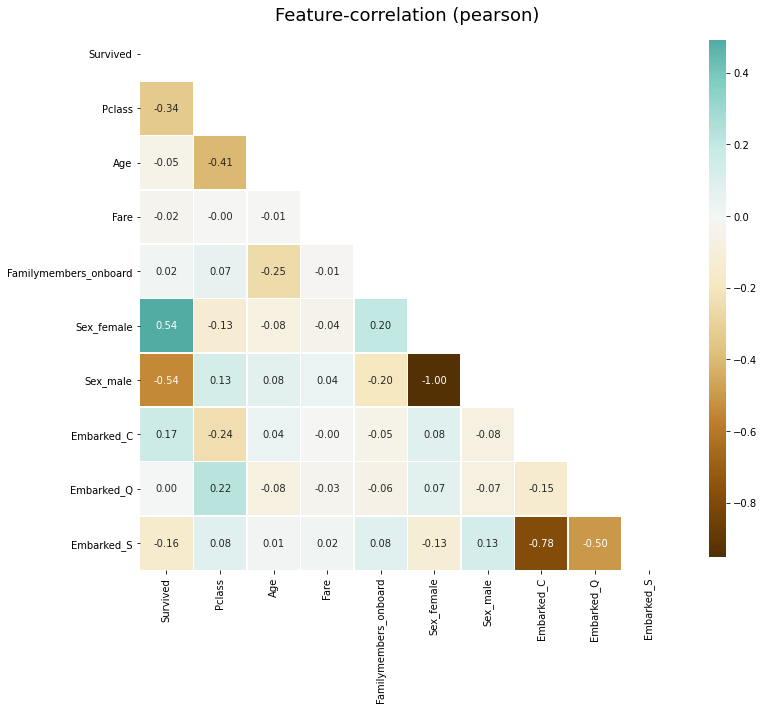

In [25]:
klib.corr_plot(train_data)

In [29]:
train_data = train_data.drop(['Sex_male','Embarked_S'],axis = 1)

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

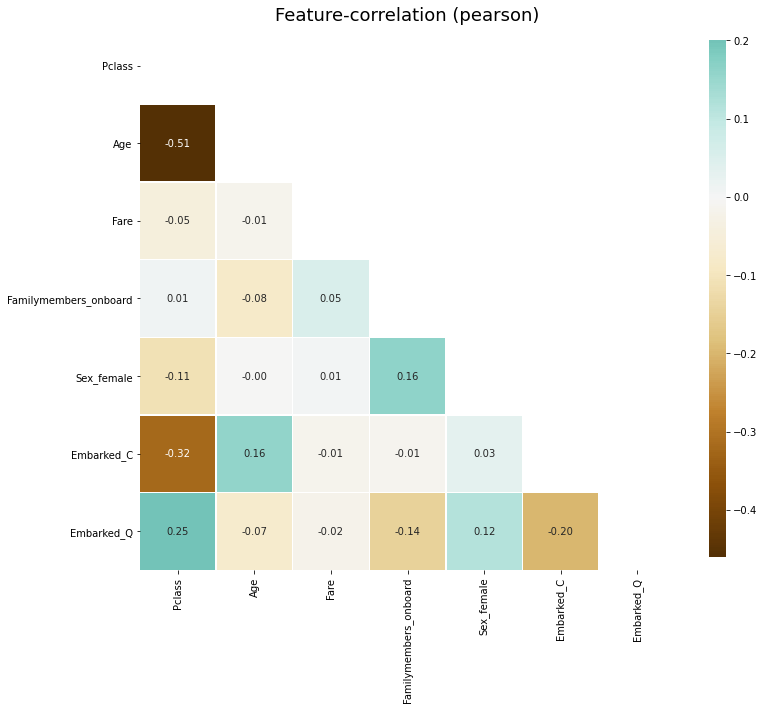

In [108]:
klib.corr_plot(test_data)

In [30]:
test_data = test_data.drop(['Sex_male','Embarked_S'],axis = 1)

## *-> Splitting the Dataset:*

In [31]:
x = train_data.drop(['Survived'], axis = 1)
y = train_data['Survived']

In [32]:
x_train, x_val, y_train, y_val = train_test_split(x, y, random_state = 42, test_size = 0.20)

### *-> Feature Scaling:*

In [33]:
scaler = StandardScaler()

In [34]:
x_train.head()

,Pclass,Age,Fare,Familymembers_onboard,Sex_female,Embarked_C,Embarked_Q
331,1,45.5,9.8250,0,0,0,0
733,2,23.0,51.8625,0,0,0,0
382,3,32.0,12.4750,0,0,0,0
704,3,26.0,39.0000,1,0,0,0
813,3,6.0,65.6344,6,1,0,0


In [35]:
#Fitting the scaler to the train data:
x_train1 = scaler.fit_transform(x_train[['Age','Fare','Familymembers_onboard','Pclass']])
x_train1 = pd.DataFrame(x_train1, columns = ['Age','Fare','Familymembers_onboard','Pclass'])

#creating a new dataframe:
x_train_new = x_train[['Sex_female','Embarked_Q','Embarked_C']].reset_index()

In [36]:
x_train_new[['Age','Fare','Familymembers_onboard','Pclass']] = x_train1[['Age','Fare','Familymembers_onboard','Pclass']]
x_train_new = pd.DataFrame(x_train_new)

In [37]:
# Scaling w.r.t test data :
x_val1 = scaler.transform(x_val[['Age','Fare','Familymembers_onboard','Pclass']])
x_val1 = pd.DataFrame(x_val1, columns = ['Age','Fare','Familymembers_onboard','Pclass'])

#creating a new dataframe:
x_val_new = x_val[['Sex_female','Embarked_Q','Embarked_C']].reset_index()

In [38]:
x_val_new[['Age','Fare','Familymembers_onboard','Pclass']] = x_val1[['Age','Fare','Familymembers_onboard','Pclass']]
x_val_new = pd.DataFrame(x_val_new)
x_val = x_val_new

## -> *Balancing the Dataset:*

*SMOTE stands for Synthetic Minority Oversampling Technique, is an oversampling technique that creates synthetic minority class data points to balance the dataset.It uses k-nearest neighbor algorithm to create synthetic data points.*

In [39]:
y_train.head()

331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64

In [40]:
x_train_new.head()

,index,Sex_female,Embarked_Q,Embarked_C,Age,Fare,Familymembers_onboard,Pclass
0,331,0,0,0,1.295529,-0.704885,-0.554666,-1.614136
1,733,0,0,0,-0.446610,1.365441,-0.554666,-0.400551
2,382,0,0,0,0.250246,-0.574374,-0.554666,0.813034
3,704,0,0,0,-0.214324,0.731969,0.040096,0.813034
4,813,1,0,0,-1.762893,2.043700,3.013909,0.813034


In [75]:
print("The value Counts of the target class is :")
v = Counter(y_train)
print(v)

The value Counts of the target class is :
Counter({0: 444, 1: 268})


In [76]:
smt = SMOTE()
x_train ,y_train = smt.fit_resample(x_train_new, y_train)
print("After Balancing the data:", Counter(y_train))

After Balancing the data: Counter({0: 444, 1: 444})


In [77]:
#Assigning it to a new variable:
x_train = x_train[['Pclass','Sex_female','Embarked_Q','Embarked_C','Age','Fare','Familymembers_onboard']]
x_val = x_val[['Pclass','Sex_female','Embarked_Q','Embarked_C','Age','Fare','Familymembers_onboard']]

## 4). Model Building :

***We will now use LazyPredict package which help us in camparing different algorithms for the dataset under consideration, after which the best performing algorithm is to be chosen.***

In [79]:
#warnings.filterwarnings("ignore")
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(predictions=True, random_state = 42)
models, predictions = clf.fit(x_train, x_val, y_train, y_val)
models

ModuleNotFoundError: No module named 'sklearn.utils.testing'

***Clearly, from the above table, we observe that AdaBooster is the best algorithm to be considered. Therefore we will now tune the parameters for AdaBooster.***

## -> Hyper Parameter Tuning of AdaBoost:

In [90]:
model = AdaBoostClassifier()
param = {'n_estimators':[10,50,100,500],
         'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]}

In [91]:
grid_search = GridSearchCV(estimator = model, param_grid = param, cv = 10, n_jobs = -1)
grid_result = grid_search.fit(x_train,y_train)
print("The Best parameters will be :",
      grid_result.best_params_)

The Best parameters will be : {'learning_rate': 1.0, 'n_estimators': 100}


## -> Applying the updated Algorithm:

In [92]:
# Applying the tuned algorithm to train and checking for the performance.
model1 = grid_result.predict(x_train)
accu_train = sklearn.metrics.accuracy_score(y_train, model1)
f1_train = sklearn.metrics.f1_score(y_train, model1)

# Applying the tuned algorithm to test data and checking for the performance.
model2 = grid_result.predict(x_val)
accu_test = sklearn.metrics.accuracy_score(y_val, model2)
f1_test = sklearn.metrics.f1_score(y_val, model2)

print("The Accuracy of AdaBoost Classifier with respect to TRAINING data :",accu_train)
print("The F1 Score of AdaBoost Classifier with respect to TRAINING data :",f1_train)
print("The Accuracy of AdaBoost Classifier with respect to TESTING data :",accu_test)
print("The F1 Score of AdaBoost Classifier with respect to TESTING data :",f1_test)

The Accuracy of AdaBoost Classifier with respect to TRAINING data : 0.8536036036036037
The F1 Score of AdaBoost Classifier with respect to TRAINING data : 0.8532731376975168
The Accuracy of AdaBoost Classifier with respect to TESTING data : 0.8100558659217877
The F1 Score of AdaBoost Classifier with respect to TESTING data : 0.7702702702702703


***Here we can clearly observe that our performace of our model is comparitively decreased after tuning the parameters.Therefore we will now use the default parameters as it will help us build a generalized model.***

## -> Applying the Default Agorithm:

In [93]:
ada_clf = AdaBoostClassifier()
ada_clf.fit(x_train, y_train)
print("The mean Accuracy Score after Cross-validation is:",
     cross_val_score(ada_clf, x_train, y_train, cv = 20, scoring = 'accuracy').mean())

The mean Accuracy Score after Cross-validation is: 0.8279040404040405


In [94]:
# Appling the model for test and train data :
ada_clf_train = ada_clf.predict(x_train)
ada_clf_test = ada_clf.predict(x_val)

acc_score_train = sklearn.metrics.accuracy_score(y_train,ada_clf_train)
f1_score_train = sklearn.metrics.f1_score(y_train, ada_clf_train)
acc_score_test = sklearn.metrics.accuracy_score(y_val,ada_clf_test)
f1_score_test = sklearn.metrics.f1_score(y_val, ada_clf_test)

print("The Accuracy of AdaBoost Classifier with respect to TRAINING data :",acc_score_train)
print("The F1 Score of AdaBoost Classifier with respect to TRAINING data :",f1_score_train)
print("The Accuracy of AdaBoost Classifier with respect to TESTING data :",acc_score_test)
print("The F1 Score of AdaBoost Classifier with respect to TESTING data :",f1_score_test)

The Accuracy of AdaBoost Classifier with respect to TRAINING data : 0.8490990990990991
The F1 Score of AdaBoost Classifier with respect to TRAINING data : 0.8490990990990991
The Accuracy of AdaBoost Classifier with respect to TESTING data : 0.8212290502793296
The F1 Score of AdaBoost Classifier with respect to TESTING data : 0.7866666666666666


## 5). Interpretation:

***After employing many different algorithms on this dataset, we finally choose AdaBoostClassifier as our predictive model thereby predicting which passengers survived the shipwreck.***

### -> Appling the model to the test dataset:

In [50]:
xtest = test_data
a = ada_clf.predict(xtest)